##  Preliminary Analysis 

Alex Lu 
January 4th, 2019 

---

Analysis of artificial aneurysms introduced in the RCA and LAD for `z_scores = [6, 8, 10, 12, 14]`, with following params: 
* RCA: ASI = 2, positions = proximal, medial, distal
* RCA: ASI = 4, positions = proximal
* RCA: ASI = 6, positions = proximal
* LAD: ASI = 2, positions = proximal 
* LAD: ASI = 4, positions = proximal
* LAD: ASI = 6, positions = proximal 


Import external dependencies.

In [1]:
import numpy as np
import vtk
from vtk.util import numpy_support as nps
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import os 

Import other requirements

In [2]:
from AneurysmGeneration.utils.batch import *  # for I/O

Configure display styles 

In [3]:
sns.set(rc={"figure.figsize":(8,6)})
sns.set_style('white', {'axes.spines.right':False})
sns.set_style('ticks')
sns.set_context('talk')
sns.despine(trim=True)

<Figure size 576x432 with 0 Axes>

Defining which parameters are being investigated. 

In [4]:
shapes = ['ASI2', 'ASI4', 'ASI6']
proximal = ['p1', 'p2', 'p3', 'p4', 'p5']
medial = ['m1', 'm2', 'm3', 'm4', 'm5']
distal = ['d1', 'd2', 'd3', 'd4', 'd5']
z_scores = [6, 8, 10, 12, 14]
left = ['lad1', 'lad2', 'lad3', 'lad4', 'lad5',]

## Right side 

In [145]:
vessel = 'RCA/'

We're going to look at the distribution of time-averaged wall shear stress over the surface (expressed as percentage of area exposed to a certain wall shear stress threshold). 

In [6]:
all_area_fractions_right = read_from_file('WSS_THRESHOLD_AREA_RCA')

reading structures from pickle
------------------------------


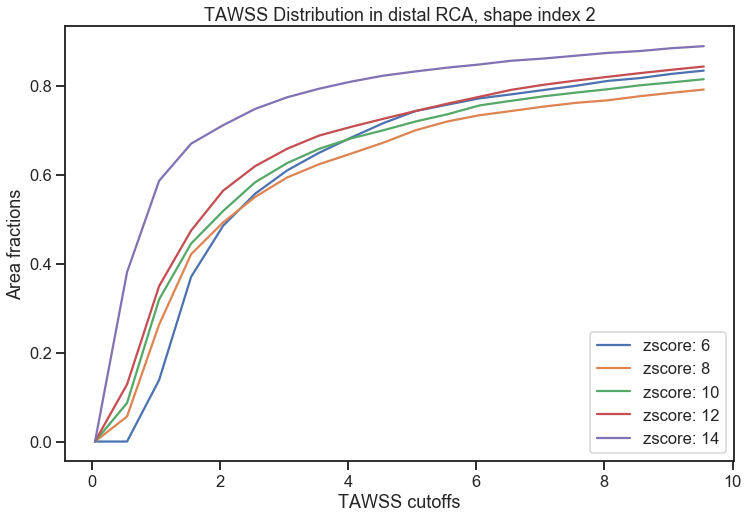

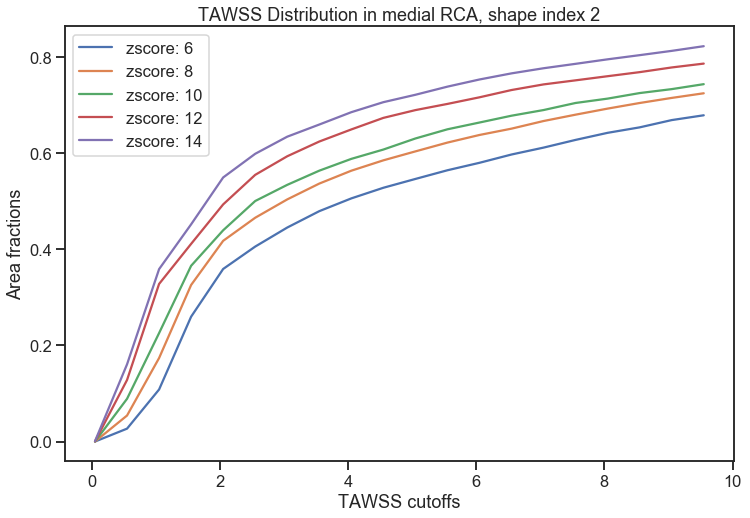

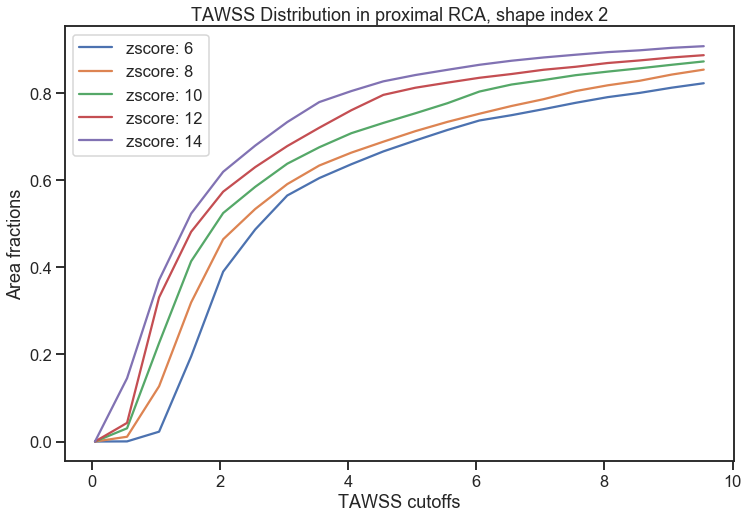

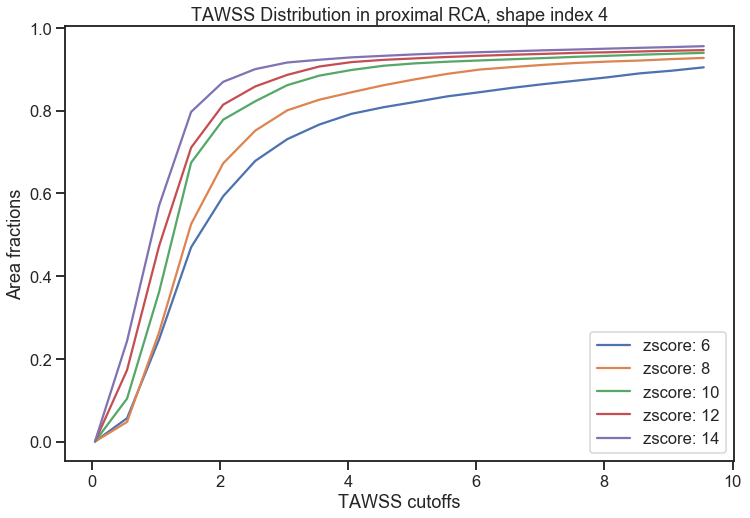

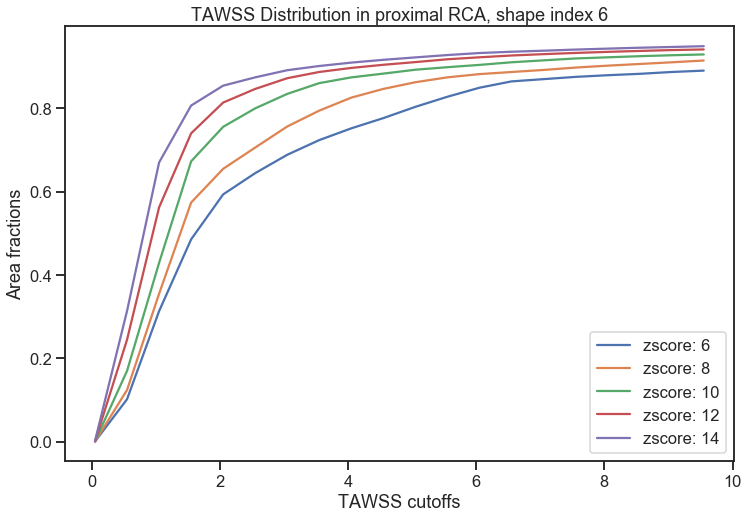

In [7]:
threshold_bounds = np.arange(.05, 10.0, .5)

for shape in shapes: 
    pos_sizes = {'proximal': proximal, 'medial': medial, 'distal': distal}
    if shape == 'ASI6' or shape == 'ASI4': 
        pos_sizes = {'proximal': proximal}
        
    for position, size_list in pos_sizes.iteritems():
        plt.figure(figsize=(12,8))
        for i, size in enumerate(size_list):
            fracs = all_area_fractions_right[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('TAWSS Distribution in ' + position + ' ' + vessel[:-1] + ', shape index ' + shape[-1])
        plt.xlabel('TAWSS cutoffs')
        plt.ylabel('Area fractions')
    

Next, examine the distribution of wall shear stress over the cardiac cycle. 

In [8]:
wss_cycle_rca = read_from_file('WSS_CYCLE_RCA')
vtawss_rca = {}


reading structures from pickle
------------------------------


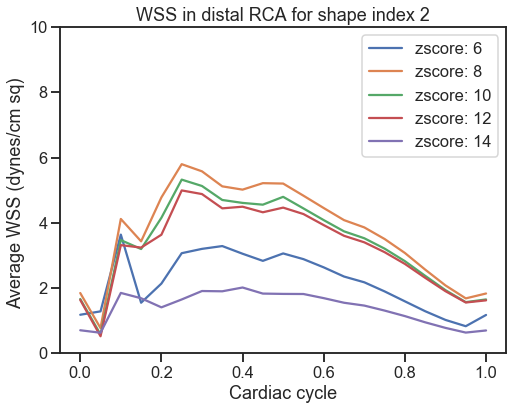

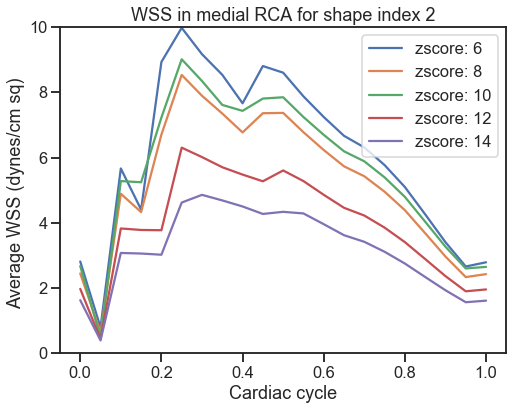

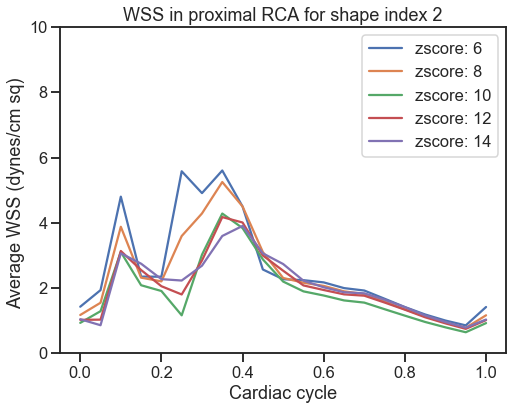

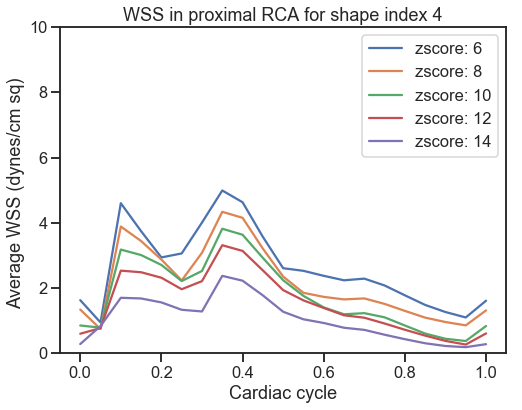

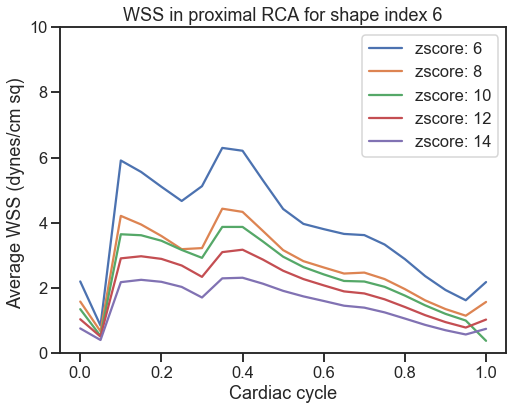

In [9]:
raw_time_steps = np.arange(3000, 4000 + 50, 50)
steps = np.linspace(0.0, 1.0, num=len(raw_time_steps))

for shape in shapes: 
    pos_sizes = {'proximal': proximal, 
                 'medial': medial, 
                 'distal': distal}
    
    if shape == 'ASI6' or shape == 'ASI4': 
        pos_sizes = {'proximal': proximal}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            wss, vtawss_rca[shape + '_' + size] = wss_cycle_rca[shape + '_' + size]
            plt.plot(steps, wss, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('WSS in ' + position + ' ' + vessel[:-1] +' for shape index ' + shape[-1])
        plt.xlabel('Cardiac cycle')
        plt.ylabel('Average WSS (dynes/cm sq) ')
        plt.ylim(0, 10)

In [10]:
print vtawss_rca

{'ASI2_m4': 6.162839121667573, 'ASI2_m5': 5.126702929367727, 'ASI2_m1': 9.325062506152364, 'ASI2_m2': 8.095573871819333, 'ASI2_m3': 8.065265043216073, 'ASI6_p5': 2.3028997812477656, 'ASI2_p4': 4.258768687730675, 'ASI6_p3': 3.261438959592608, 'ASI6_p2': 3.489050047496766, 'ASI6_p1': 4.560024830802255, 'ASI2_d5': 3.4756616674855416, 'ASI2_d4': 5.5074242924566015, 'ASI2_d3': 6.071565716206496, 'ASI2_d2': 7.036241712347224, 'ASI2_d1': 6.1060487762549345, 'ASI6_p4': 2.8064932741733815, 'ASI2_p3': 4.528761021144777, 'ASI2_p2': 5.2734186400575, 'ASI2_p1': 5.70064056673873, 'ASI4_p1': 4.119852977224037, 'ASI4_p3': 3.026490621253173, 'ASI4_p2': 3.5390859592178874, 'ASI4_p5': 2.027682077585665, 'ASI4_p4': 2.619708568619234, 'ASI2_p5': 3.996549450840954}


In [27]:
print threshold_bounds

[0.05 0.55 1.05 1.55 2.05 2.55 3.05 3.55 4.05 4.55 5.05 5.55 6.05 6.55
 7.05 7.55 8.05 8.55 9.05 9.55]


In [182]:
import matplotlib.animation as animation
from IPython.display import HTML
animation_vessel = 'RCA/'
#animation_vessel = 'LAD/'
if animation_vessel == 'LAD/': 
    area_fracs = all_area_fractions_lad
    sizes = ['lad1', 'lad2', 'lad3', 'lad4', 'lad5']
else: 
    area_fracs = all_area_fractions_right
    sizes = proximal

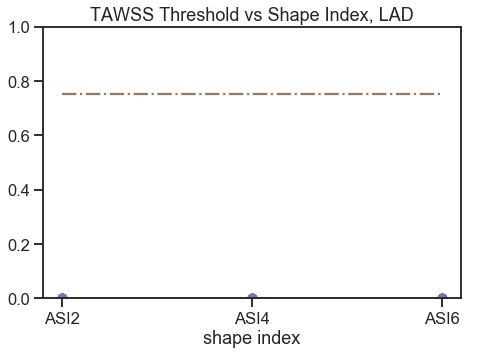

In [162]:
labels = ['prox', 'med', 'dist']
plotted_z_scores = [6, 8, 10, 12, 14]
threshold_bounds = np.arange(.05, 10.0, .5)
plot_idx = 2

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('shape index')
plt.title('TAWSS Threshold vs Shape Index, ' + animation_vessel[:-1] )
plt.ylim(0, 1)

# initialize the lines
lines = []
for index in range(len(plotted_z_scores)):
    lobj = ax.plot(shapes,[0, 0, 0],lw=2, marker='o', label='z-score = ' + str(plotted_z_scores[index]))[0]
    lines.append(lobj)

def init(): 
    ax.plot(shapes, [.75, .75, .75], linestyle='-.')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    return lines

def animate(plot_idx): 
    ys =[]
    for k, size in enumerate(sizes):  
        vtawss_sub_threshold_fracs = np.zeros(len(shapes))
        for c, shape in enumerate(shapes):
            vtawss_sub_threshold_fracs[c] = area_fracs[shape + '_' + size][plot_idx]
        ys.append(vtawss_sub_threshold_fracs)
        
    for lnum,line in enumerate(lines):
        line.set_ydata(ys[lnum]) # set data for each line separately. 

    ax.set_ylabel('Fraction of Surface Area Under %.2f'%(threshold_bounds[plot_idx]))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    return lines
    

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(threshold_bounds), interval=600, blit=True)


In [157]:
HTML(anim.to_jshtml())

Here, we also want to capture specific frames. 

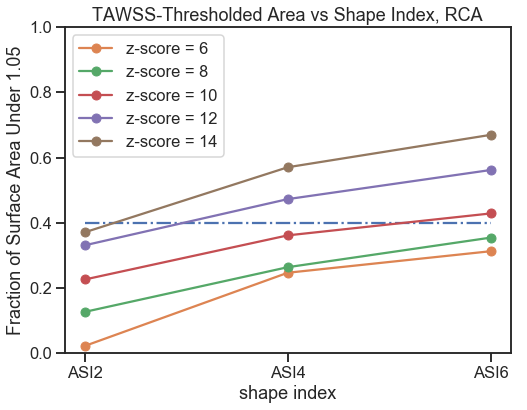

In [185]:
labels = ['prox', 'med', 'dist']
plotted_z_scores = [6, 8, 10, 12, 14]
threshold_bounds = np.arange(.05, 10.0, .5)
plot_idx = 2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(shapes, [.4, .4, .4], linestyle='-.')

for k, size in enumerate(sizes):  
    vtawss_sub_threshold_fracs = np.zeros(len(shapes))
    for c, shape in enumerate(shapes):
        vtawss_sub_threshold_fracs[c] = area_fracs[shape + '_' + size][plot_idx]
    
    ax.plot(shapes, vtawss_sub_threshold_fracs, label='z-score = ' + str(plotted_z_scores[k]), marker='o')
    
plt.legend()
plt.xlabel('shape index')
plt.ylabel('Fraction of Surface Area Under %.2f'%(threshold_bounds[plot_idx]))
plt.title('TAWSS-Thresholded Area vs Shape Index, ' + animation_vessel[:-1] )
plt.ylim(0, 1)
plt.show()


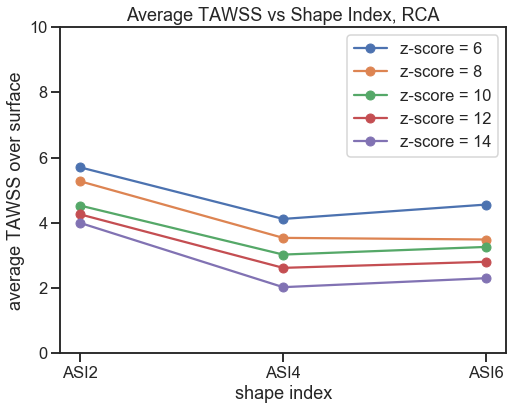

In [173]:
labels = ['prox', 'med', 'dist']
plotted_z_scores = [6, 8, 10, 12, 14]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for k, size in enumerate(proximal):  
    vtawss_surface_averages = np.zeros(len(shapes))
    for c, shape in enumerate(shapes):
        vtawss_surface_averages[c] = vtawss_rca[shape + '_' + size]
    
    ax.plot(shapes, vtawss_surface_averages, label='z-score = ' + str(plotted_z_scores[k]), marker='o')
    
plt.legend()
plt.xlabel('shape index')
plt.ylabel('average TAWSS over surface')
plt.title('Average TAWSS vs Shape Index, ' + vessel[:-1] )
plt.ylim(0, 10)
plt.show()


In [13]:
osi_areas_rca = read_from_file('OSI_THRESHOLD_AREA_RCA')
osi_rca = {}

reading structures from pickle
------------------------------


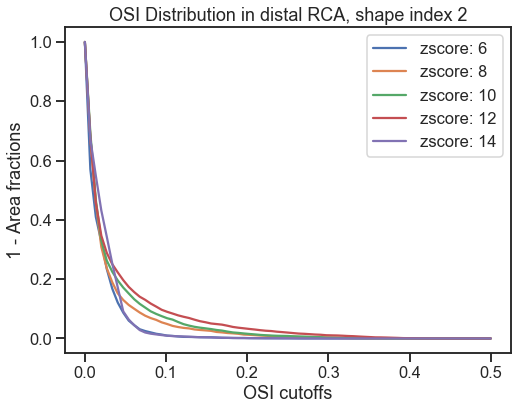

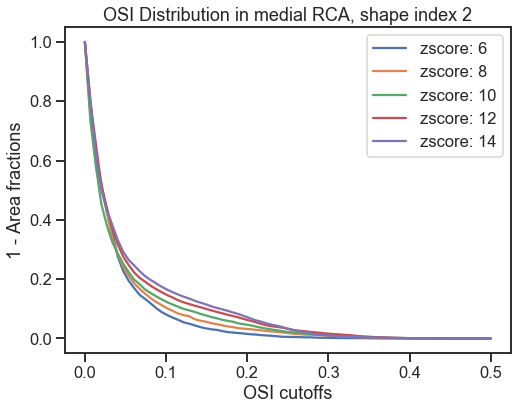

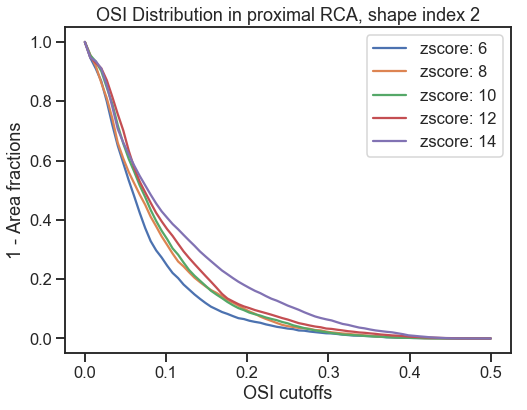

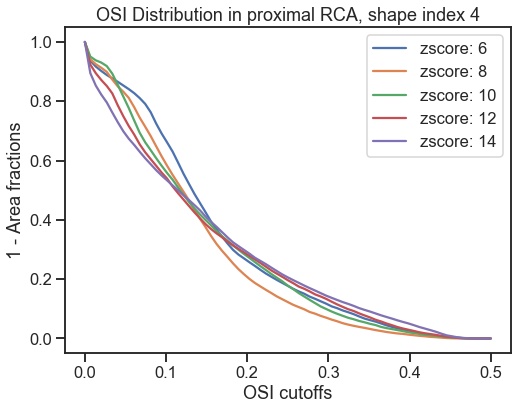

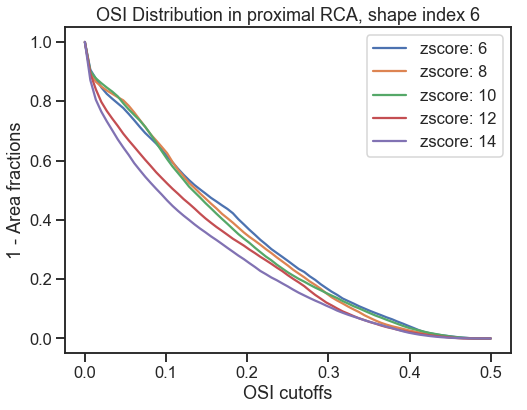

In [14]:
threshold_bounds = np.linspace(0, .5, num=75)

for shape in shapes: 
    pos_sizes = {'proximal': proximal, 'medial': medial, 'distal': distal}
    if shape == 'ASI6' or shape == 'ASI4': 
        pos_sizes = {'proximal': proximal}
        
    for position, size_list in pos_sizes.iteritems():
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            fracs = osi_areas_rca[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('OSI Distribution in ' + position + ' ' + vessel[:-1] + ', shape index ' + shape[-1])
        plt.xlabel('OSI cutoffs')
        plt.ylabel('1 - Area fractions')

### Moving onto the left side. 

In [176]:
vessel = 'LAD/'
shapes = ['ASI2', 'ASI4', 'ASI6']
z_scores = [6, 8, 10, 12, 14]
left_positions = ['lad1', 'lad2', 'lad3', 'lad4', 'lad5']

In [16]:
all_area_fractions_lad = read_from_file('WSS_THRESHOLD_AREA_LAD')

reading structures from pickle
------------------------------


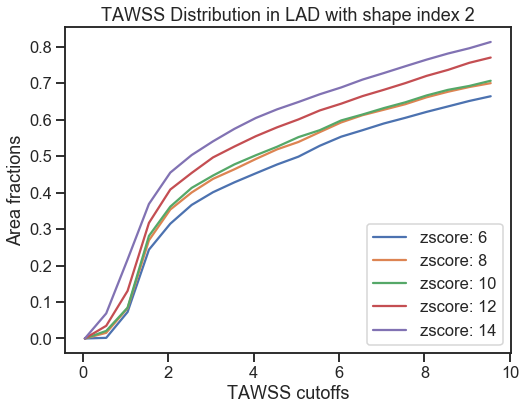

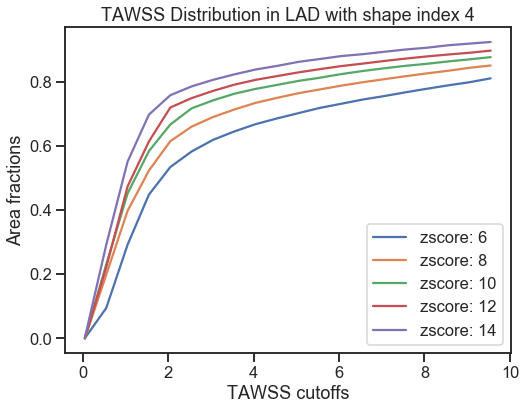

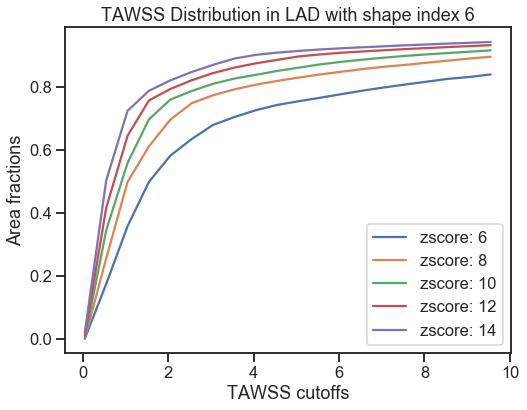

In [17]:
threshold_bounds = np.arange(.05, 10.0, .5)

for shape in shapes: 
    pos_sizes = {'LAD': ['lad1', 'lad2', 'lad3','lad4','lad5']}
    # if shape == 'ASI6': pos_sizes = {'LAD': ['lad2', 'lad3','lad4','lad5']}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            fracs = all_area_fractions_lad[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('TAWSS Distribution in ' + vessel[:-1] + ' with shape index ' + shape[-1])
        plt.xlabel('TAWSS cutoffs')
        plt.ylabel('Area fractions')

In [18]:
wss_cycle_lad = read_from_file('WSS_CYCLE_LAD')
vtawss_lad = {}

reading structures from pickle
------------------------------


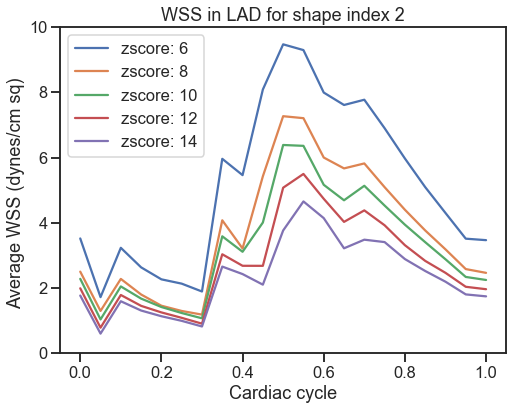

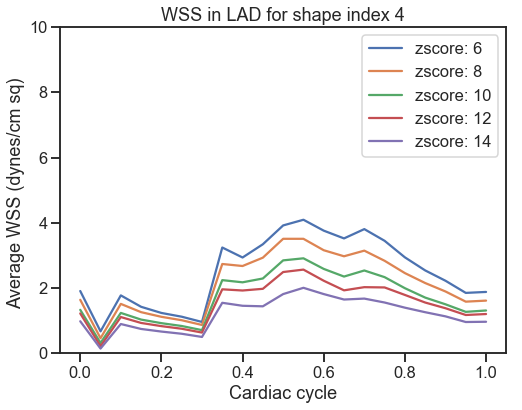

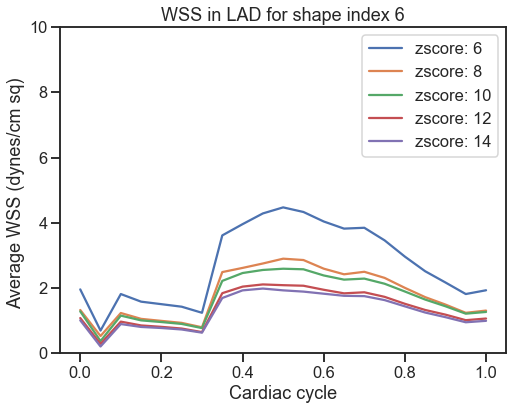

In [19]:
raw_time_steps = np.arange(3000, 4000 + 50, 50)
steps = np.linspace(0.0, 1.0, num=len(raw_time_steps))

for shape in shapes: 
    pos_sizes = {'LAD': ['lad1', 'lad2', 'lad3','lad4','lad5']}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            wss, vtawss_lad[shape + '_' + size] = wss_cycle_lad[shape + '_' + size]
            plt.plot(steps, wss, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('WSS in ' + vessel[:-1] + ' for shape index ' + shape[-1])
        plt.xlabel('Cardiac cycle')
        plt.ylabel('Average WSS (dynes/cm sq) ')
        plt.ylim(0, 10)

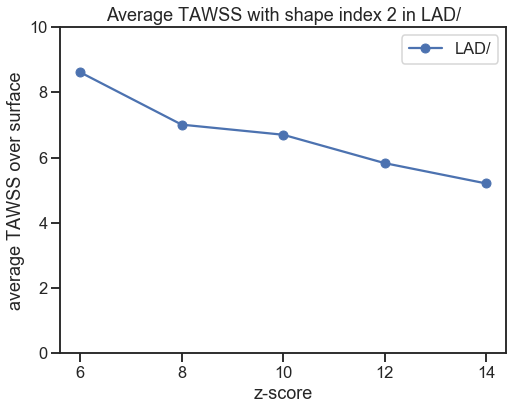

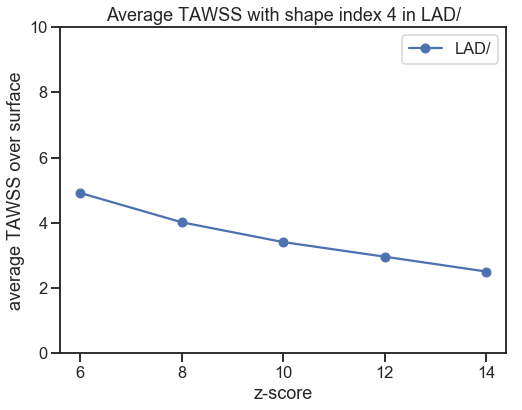

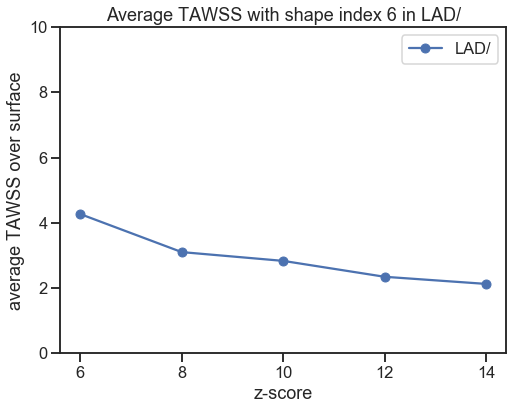

In [20]:
for shape in shapes: 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    loc_set = left_positions
    vtawss_surface_averages = np.zeros(len(loc_set))
    for k, size in enumerate(loc_set):
        vtawss_surface_averages[k] = vtawss_lad[shape + '_' + size]

    ax.plot(z_scores, vtawss_surface_averages, label=vessel, marker='o')
    plt.legend()
    plt.xlabel('z-score')
    plt.ylabel('average TAWSS over surface')
    plt.title('Average TAWSS with shape index ' + shape[-1] + ' in ' + vessel)
    plt.ylim(0, 10)
    ax.set_xticks(z_scores)

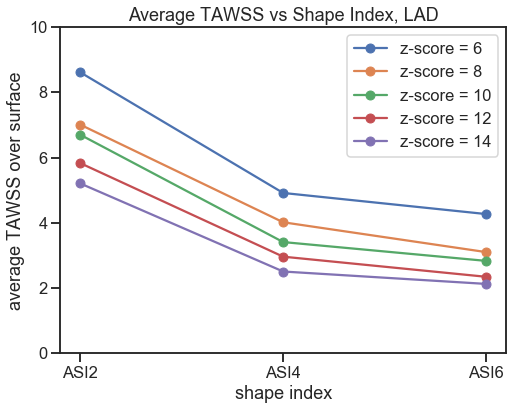

In [177]:
plotted_z_scores = [6, 8, 10, 12, 14]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for k, size in enumerate(left_positions):  
    vtawss_surface_averages = np.zeros(len(shapes))
    for c, shape in enumerate(shapes):
        vtawss_surface_averages[c] = vtawss_lad[shape + '_' + size]
    
    ax.plot(shapes, vtawss_surface_averages, label='z-score = ' + str(plotted_z_scores[k]), marker='o')
    
plt.legend()
plt.xlabel('shape index')
plt.ylabel('average TAWSS over surface')
plt.title('Average TAWSS vs Shape Index, ' +  vessel[:-1] )
plt.ylim(0, 10)
plt.show()

In [22]:
osi_areas_lad = read_from_file('OSI_THRESHOLD_AREA_LAD')
osi_lad = {}

reading structures from pickle
------------------------------


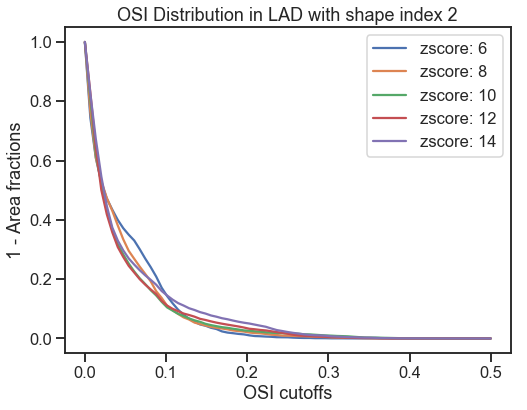

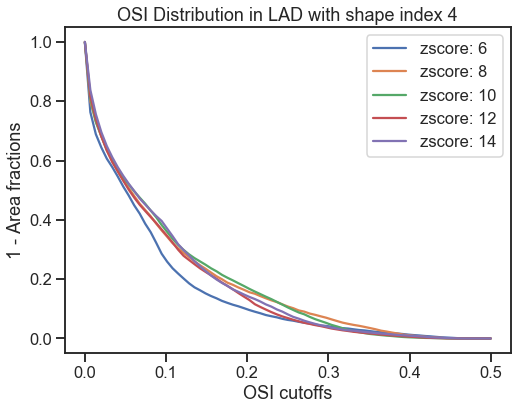

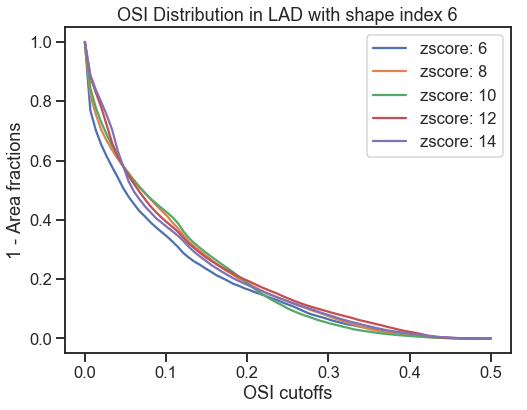

In [23]:
threshold_bounds = np.linspace(0, .5, num=75)

for shape in shapes: 
    pos_sizes = {'LAD': ['lad1', 'lad2', 'lad3','lad4','lad5']}
    # if shape == 'ASI6': pos_sizes = {'LAD': ['lad2', 'lad3','lad4','lad5']}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            fracs = osi_areas_lad[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('OSI Distribution in ' + vessel[:-1] + ' with shape index ' + shape[-1])
        plt.xlabel('OSI cutoffs')
        plt.ylabel('1 - Area fractions')
  

#### Summary of average TAWSS with respect to z-score for each shape index

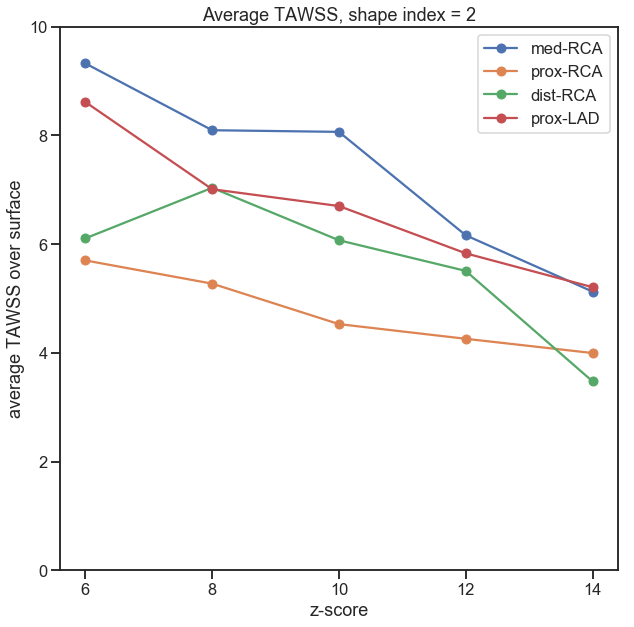

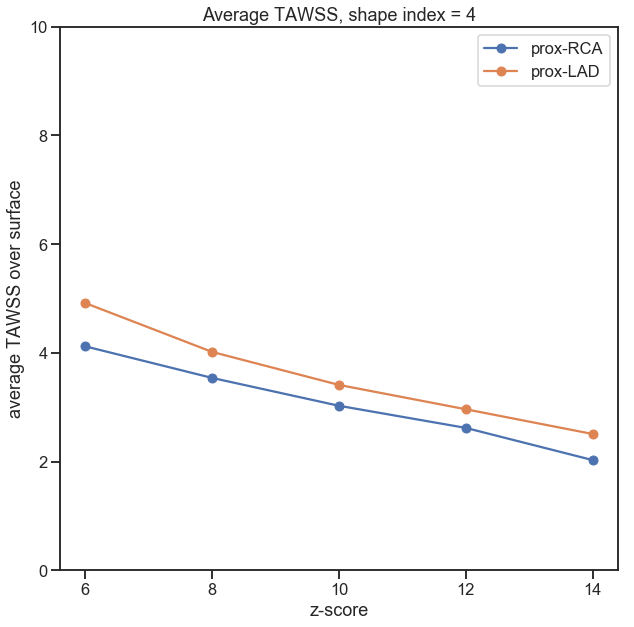

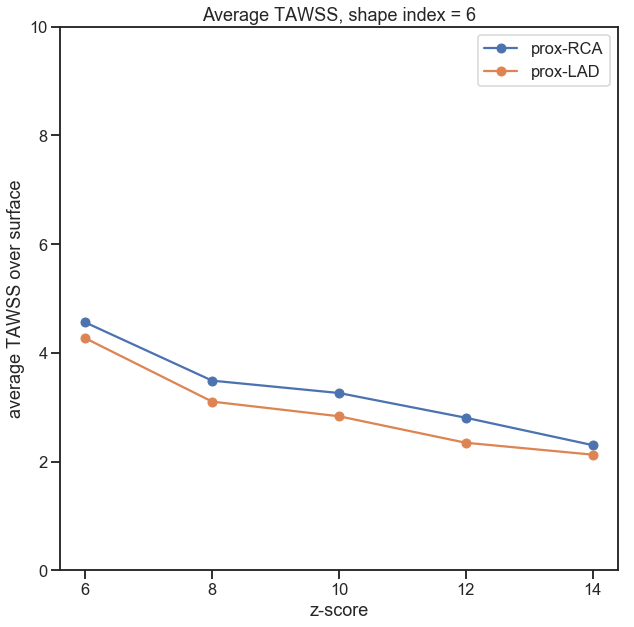

In [24]:
labels = {'prox-RCA': proximal, 
          'med-RCA': medial, 
          'dist-RCA': distal,
          'prox-LAD': left
         }

for shape in shapes: 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    for label, location_sizes in labels.iteritems():
        vtawss_surface_averages = np.zeros(len(location_sizes))
        for c, size in enumerate(location_sizes):
            source = vtawss_rca if 'RCA'in label else vtawss_lad
            
            try:
                vtawss_surface_averages[c] = source[shape + '_' + size]
            except:
                continue
        
        if not np.any(vtawss_surface_averages): continue
        ax.plot(z_scores, vtawss_surface_averages, label=label, marker='o')
        
    plt.legend()
    plt.xlabel('z-score')
    plt.ylabel('average TAWSS over surface')
    plt.title('Average TAWSS, shape index = ' + shape[-1] )
    plt.ylim(0, 10)
    ax.set_xticks(z_scores)
            